## Overall Analysis and Implementation Plan

- ID - Set as Row Index - All values unique
- User_ID - Drop - PII - mobile number - we don't use personal Information Identifiers in machine learning features
- Vehicle_model_id - Drop, since > 70% of values are 12
- Divide the data into 3 dataset based on travel_type_id, since for different travel types different features are applicable
- After dividing the data into 3 subsets, 3 different machine learning ,models are to be created:
1. ML Model 1 for travel_type_1
2. ML Model 2 for travel_type_2
3. ML Model 3 for travel_type_3

## Below is the column-wise analysis for each subset regarding if they need to be dropped , kept or transformed.

### For travel_type_id = 1

- package_id - drop - all null values
- travel_type_id - drop = all same values
- from_area_id - transform and drop into cancellation volume i.e zero, High, Medium or Low cancellation area
- to_area_id - drop - all values null
- from_city_id - use mode to impute the null values
- to_city_id - use mode to impute the null values
- Make a column for inter-city routes - from_city_id -> to_city_id
- city_routes - transform into cancellation volumn i.e zero, High, Medium or Low cancellation routes
- to_city_id, from_city_id, routes, cancellation_perc - drop
- from_dat - transform into - dayOfWeek, Month, Weekday/Weekend, TImeofDay(Hour | Morning Afternoon Evening Night)
- time_diff - calcualte the number of hours b/w bookning and actual start time in hours
- booking_nature - transform the time_diff into Urgent, SameDays, Regular, Advance booking, since time_diff has > 10% outliers
- online_booking | moblie_site_booking - keep
- from_date - drop
- booking_created - drop
- drop all 4 lat/long(from_lat, from_long, to_lat, to_long) as to_lat and to_long has all NULL values and from_lat, from_long's information is already captured in from_area_id

## For travel_type_id = 2

- package_id - drop - all null values
- travel_type_id - drop - all same values
- from_area_id, to_area_id - Make a column for intra-city routes -from_area_id -> to_area_id - transform into cancellation volumn i.e zero, High,Medium or Low cancellation routes
- from_city_id - drop - all values null
- to_city_id - drop - all values null
- from_date - transform into - dayOfWeek, Month, Weekday/weeekend, TimeofDay(Hour| Morning Afternoon Evening Night)
- time_diff - calculated the number of hours b/w booking and actual start time in hours
- booking_nature - transform the time_diff into Urgent, SameDay, Regular, Advanced bookings, since time_diff has > 10 % outliers
- online_booking | mobile_site_booking - keep
- from_date - drop
- booking_created - drop
- from_lat, from_long, to_lat, to_long - impute missing using median
- from these lat/long - calculate the distance in KM (geopy) and then drop all four lat/long col

## For travel_type_id = 3

- package_id - keep
- travel_type_id - drop - all same values
- from_area_id - transform and drop into cancellation volumn i.e zero, High,Medium or Low cancellation area
- to_area_id -drop - all values null
- from_city_id - drop - all values null
- to_city_id - drop - all values null
- from_date - transform into - dayOfWeek, Month, Weekday/weeekend, TimeofDay(Hour| Morning Afternoon Evening Night)
- time_diff - calculated the number of hours b/w booking and actual start time in hours
- booking_nature - transform the time_diff into Urgent, SameDay, Regular, Advanced bookings, since time_diff has > 10 % outliers
- online_booking | mobile_site_booking - keep
- from_date - drop
- booking_created - drop
- drop all 4 lat/long(from_lat, from_long, to_lat, to_long) as to_lat and to_long has all NULL values and from_lat,from_long's information is already captured in from_area_id

### Process these subsets if required such as label encoding etc.

## Machine Learning - Classification

- Decision Tree
- Random Forest
- Naive Bayes Classifier

### Compare the performance amd then select the BEST model for each of the three datasets

## Load the dataset

In [317]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [318]:
data = pd.read_csv('YourCabs.csv')
data.head()

,id,user_id,vehicle_model_id,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,2,NaN,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,2,NaN,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,2,NaN,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,2,NaN,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,2,NaN,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0


In [319]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43431 non-null  int64  
 1   user_id              43431 non-null  int64  
 2   vehicle_model_id     43431 non-null  int64  
 3   travel_type_id       43431 non-null  int64  
 4   package_id           7550 non-null   float64
 5   from_area_id         43343 non-null  float64
 6   to_area_id           34293 non-null  float64
 7   from_city_id         16345 non-null  float64
 8   to_city_id           1588 non-null   float64
 9   from_date            43431 non-null  object 
 10  online_booking       43431 non-null  int64  
 11  mobile_site_booking  43431 non-null  int64  
 12  booking_created      43431 non-null  object 
 13  from_lat             43338 non-null  float64
 14  from_long            43338 non-null  float64
 15  to_lat               34293 non-null 

## Set id as ROW INDEX 

In [321]:
data.set_index('id',inplace=True)
data.head()

,user_id,vehicle_model_id,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
id,,,,,,,,,,,,,,,,,
132512,22177,28,2,NaN,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
132513,21413,12,2,NaN,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
132514,22178,12,2,NaN,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
132515,13034,12,2,NaN,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
132517,22180,12,2,NaN,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0


## Drop user_id & vehicle_model_id

In [323]:
data.drop(['user_id','vehicle_model_id'],axis=1 ,inplace=True)
data.head()

,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
id,,,,,,,,,,,,,,,
132512,2,NaN,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
132513,2,NaN,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
132514,2,NaN,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
132515,2,NaN,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
132517,2,NaN,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0


## Validate the Data Type for each col

In [325]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43431 entries, 132512 to 185941
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   travel_type_id       43431 non-null  int64  
 1   package_id           7550 non-null   float64
 2   from_area_id         43343 non-null  float64
 3   to_area_id           34293 non-null  float64
 4   from_city_id         16345 non-null  float64
 5   to_city_id           1588 non-null   float64
 6   from_date            43431 non-null  object 
 7   online_booking       43431 non-null  int64  
 8   mobile_site_booking  43431 non-null  int64  
 9   booking_created      43431 non-null  object 
 10  from_lat             43338 non-null  float64
 11  from_long            43338 non-null  float64
 12  to_lat               34293 non-null  float64
 13  to_long              34293 non-null  float64
 14  Car_Cancellation     43431 non-null  int64  
dtypes: float64(9), int64(4), object(2)


In [326]:
# data['package_id'] = data['package_id'].astype('int')
# data['from_area_id'] = data['from_area_id'].astype('object')
# data['to_area_id'] = data['to_area_id'].astype('object')
# data['from_city_id'] = data['from_city_id'].astype('object')
# data['to_city_id'] = data['to_city_id'].astype('object')

# data['from_date'] = pd.to_datetime(data['from_date'],format='mixed')
# data['booking_created'] = pd.to_datetime(data['booking_created'],format='mixed')


## Divided the dataset into 3 parts based on the travel_type_id

In [328]:
tt1 = data.loc[data.travel_type_id == 1]
tt1.head()

,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
id,,,,,,,,,,,,,,,
132519,1,NaN,571.0,NaN,15.0,108.0,01-01-2013 09:45,0,0,01-01-2013 09:21,12.951850,77.696420,NaN,NaN,0
132531,1,NaN,1383.0,NaN,NaN,32.0,01-12-2013 08:00,1,0,01-01-2013 12:17,12.930451,77.685822,NaN,NaN,0
132539,1,NaN,515.0,NaN,15.0,32.0,01-05-2013 08:30,0,0,01-01-2013 14:40,12.978960,77.673450,NaN,NaN,0
132697,1,NaN,136.0,NaN,1.0,152.0,01-04-2013 09:30,1,0,01-03-2013 12:19,12.907960,77.624180,NaN,NaN,0
132760,1,NaN,1118.0,NaN,NaN,32.0,01-06-2013 07:30,1,0,01-04-2013 09:32,12.930220,77.560390,NaN,NaN,0


In [329]:
tt2 = data.loc[data.travel_type_id == 2]
tt2.head()

,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
id,,,,,,,,,,,,,,,
132512,2,NaN,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
132513,2,NaN,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
132514,2,NaN,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
132515,2,NaN,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
132517,2,NaN,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0


In [330]:
tt3 = data.loc[data.travel_type_id == 3]
tt3.head()

,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
id,,,,,,,,,,,,,,,
132521,3,2.0,448.0,NaN,NaN,NaN,01-01-2013 16:00,0,0,01-01-2013 09:44,12.927320,77.635750,NaN,NaN,0
132535,3,2.0,471.0,NaN,NaN,NaN,01-01-2013 14:30,0,0,01-01-2013 12:52,13.018540,77.635240,NaN,NaN,0
132538,3,1.0,1286.0,NaN,NaN,NaN,01-01-2013 16:30,0,0,01-01-2013 14:39,12.973448,77.620320,NaN,NaN,0
132552,3,1.0,1323.0,NaN,NaN,NaN,01-01-2013 20:00,1,0,01-01-2013 17:25,12.869805,77.653211,NaN,NaN,0
132569,3,2.0,142.0,NaN,NaN,NaN,01-02-2013 03:00,0,0,01-01-2013 19:37,12.912810,77.609230,NaN,NaN,0


## preprocessing tt1

In [332]:
tt1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1589 entries, 132519 to 185916
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   travel_type_id       1589 non-null   int64  
 1   package_id           0 non-null      float64
 2   from_area_id         1501 non-null   float64
 3   to_area_id           1 non-null      float64
 4   from_city_id         1393 non-null   float64
 5   to_city_id           1588 non-null   float64
 6   from_date            1589 non-null   object 
 7   online_booking       1589 non-null   int64  
 8   mobile_site_booking  1589 non-null   int64  
 9   booking_created      1589 non-null   object 
 10  from_lat             1496 non-null   float64
 11  from_long            1496 non-null   float64
 12  to_lat               1 non-null      float64
 13  to_long              1 non-null      float64
 14  Car_Cancellation     1589 non-null   int64  
dtypes: float64(9), int64(4), object(2)
m

## Drop the discussed cols

In [334]:
tt1.drop(['travel_type_id','package_id','to_area_id','from_lat','from_long','to_lat','to_long'],axis=1, inplace=True)
tt1.head(2)

,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation
id,,,,,,,,
132519,571.0,15.0,108.0,01-01-2013 09:45,0,0,01-01-2013 09:21,0
132531,1383.0,NaN,32.0,01-12-2013 08:00,1,0,01-01-2013 12:17,0


In [335]:
tt1['from_area_id'] = tt1['from_area_id'].astype('object')
tt1['from_city_id'] = tt1['from_city_id'].astype('object')
tt1['to_city_id'] = tt1['to_city_id'].astype('object')

In [336]:
tt1['from_date'] = pd.to_datetime(tt1['from_date'],format = 'mixed')
tt1['booking_created'] = pd.to_datetime(tt1['booking_created'],format='mixed')

In [337]:
tt1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1589 entries, 132519 to 185916
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   from_area_id         1501 non-null   object        
 1   from_city_id         1393 non-null   object        
 2   to_city_id           1588 non-null   object        
 3   from_date            1589 non-null   datetime64[ns]
 4   online_booking       1589 non-null   int64         
 5   mobile_site_booking  1589 non-null   int64         
 6   booking_created      1589 non-null   datetime64[ns]
 7   Car_Cancellation     1589 non-null   int64         
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 111.7+ KB


## Missing Values Treatment

In [339]:
tt1.isnull().sum()

from_area_id            88
from_city_id           196
to_city_id               1
from_date                0
online_booking           0
mobile_site_booking      0
booking_created          0
Car_Cancellation         0
dtype: int64

In [340]:
tt1.describe(include=object)

,from_area_id,from_city_id,to_city_id
count,1501.0,1393.0,1588.0
unique,297.0,3.0,116.0
top,393.0,15.0,32.0
freq,257.0,1281.0,475.0


In [341]:
tt1.from_area_id.fillna('393.0',inplace=True)
tt1.from_city_id.fillna('15.0',inplace=True)
tt1.to_city_id.fillna('32.0',inplace=True)

In [342]:
tt1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1589 entries, 132519 to 185916
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   from_area_id         1589 non-null   object        
 1   from_city_id         1589 non-null   object        
 2   to_city_id           1589 non-null   object        
 3   from_date            1589 non-null   datetime64[ns]
 4   online_booking       1589 non-null   int64         
 5   mobile_site_booking  1589 non-null   int64         
 6   booking_created      1589 non-null   datetime64[ns]
 7   Car_Cancellation     1589 non-null   int64         
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 111.7+ KB


## Transform & drop from_area_id

In [344]:
tt1[['from_area_id','Car_Cancellation']].groupby('from_area_id').mean()

,Car_Cancellation
from_area_id,
2.0,0.000000
24.0,0.000000
25.0,0.000000
49.0,0.000000
58.0,0.000000
...,...
1395.0,0.000000
1396.0,0.000000
1397.0,0.000000


In [345]:
from_area_id_cancel_perc = tt1[['from_area_id','Car_Cancellation']].groupby('from_area_id').mean()['Car_Cancellation']
tt1['from_area_cancel_perc'] = tt1.from_area_id.map(from_area_id_cancel_perc)
tt1.head()

,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,from_area_cancel_perc
id,,,,,,,,,
132519,571.0,15.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,0.020408
132531,1383.0,15.0,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0.000000
132539,515.0,15.0,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0.000000
132697,136.0,1.0,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0.000000
132760,1118.0,15.0,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0.000000


In [346]:
tt1.loc[tt1.from_area_cancel_perc > 0, 'from_area_cancel_perc']

id
132519    0.020408
132907    0.003891
132911    0.076923
133098    0.003891
133312    0.166667
            ...   
185701    0.020408
185732    0.003891
185738    0.020408
185843    0.003891
185899    0.003891
Name: from_area_cancel_perc, Length: 610, dtype: float64

In [347]:
tt1.loc[tt1.from_area_cancel_perc > 0, 'from_area_cancel_perc'].describe()

count    610.000000
mean       0.034426
std        0.066407
min        0.003891
25%        0.003891
50%        0.020408
75%        0.022727
max        0.500000
Name: from_area_cancel_perc, dtype: float64

In [348]:
tt1.loc[tt1.from_area_cancel_perc > 0, 'from_area_cancel_perc'].quantile(0.33)

0.0038910505836575876

In [349]:
tt1.loc[tt1.from_area_cancel_perc > 0, 'from_area_cancel_perc'].quantile(0.66)

0.022640232108317213

In [350]:
tt1['from_area_cancel_vol'] = np.where(tt1.from_area_cancel_perc > 0.02264, 'High',
                              np.where(tt1.from_area_cancel_perc == 0.0, 'zero',
                              np.where(tt1.from_area_cancel_perc < 0.0039, 'Low','Medium')))

In [351]:
tt1.head(20)

,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,from_area_cancel_perc,from_area_cancel_vol
id,,,,,,,,,,
132519,571.0,15.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,0.020408,Medium
132531,1383.0,15.0,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0.000000,zero
132539,515.0,15.0,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0.000000,zero
132697,136.0,1.0,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0.000000,zero
132760,1118.0,15.0,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0.000000,zero
132780,293.0,15.0,32.0,2013-01-05 08:00:00,0,0,2013-01-04 12:43:00,0,0.000000,zero
132781,912.0,1.0,32.0,2013-01-05 06:00:00,1,0,2013-01-04 12:51:00,0,0.000000,zero
132791,410.0,15.0,29.0,2013-01-09 06:00:00,0,0,2013-01-04 14:40:00,0,0.000000,zero
132907,393.0,15.0,32.0,2013-01-05 22:45:00,0,0,2013-01-05 15:29:00,0,0.003891,Low


In [352]:
tt1.drop(['from_area_id','from_area_cancel_perc'],axis=1,inplace=True)
tt1.head()

,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,from_area_cancel_vol
id,,,,,,,,
132519,15.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,Medium
132531,15.0,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,zero
132539,15.0,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,zero
132697,1.0,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,zero
132760,15.0,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,zero


## Transform & drop from_city_id and to_city_id

In [354]:
tt1['city_route'] = tt1.from_city_id.astype('str') + '->' + tt1.to_city_id.astype('str')
tt1.head()

,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,from_area_cancel_vol,city_route
id,,,,,,,,,
132519,15.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,Medium,15.0->108.0
132531,15.0,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,zero,15.0->32.0
132539,15.0,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,zero,15.0->32.0
132697,1.0,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,zero,1.0->152.0
132760,15.0,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,zero,15.0->32.0


In [355]:
city_route_cancel_perc = tt1[['city_route','Car_Cancellation']].groupby('city_route').mean()['Car_Cancellation']
tt1['city_route_cancel_perc'] = tt1.city_route.map(city_route_cancel_perc)
tt1.head()

,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,from_area_cancel_vol,city_route,city_route_cancel_perc
id,,,,,,,,,,
132519,15.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,Medium,15.0->108.0,0.016129
132531,15.0,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,zero,15.0->32.0,0.017937
132539,15.0,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,zero,15.0->32.0,0.017937
132697,1.0,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,zero,1.0->152.0,0.000000
132760,15.0,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,zero,15.0->32.0,0.017937


In [356]:
tt1.loc[tt1.city_route_cancel_perc > 0, 'city_route_cancel_perc'].quantile(0.33)

0.017937219730941704

In [357]:
tt1.loc[tt1.city_route_cancel_perc > 0, 'city_route_cancel_perc'].quantile(0.66)

0.017937219730941704

In [358]:
tt1.loc[tt1.city_route_cancel_perc > 0, 'city_route_cancel_perc'].describe()

count    793.000000
mean       0.026482
std        0.019527
min        0.012048
25%        0.017937
50%        0.017937
75%        0.037037
max        0.086957
Name: city_route_cancel_perc, dtype: float64

In [359]:
tt1['city_route_cancel_vol'] = np.where(tt1.city_route_cancel_perc >= 0.018, 'High',
                              np.where(tt1.city_route_cancel_perc == 0.0, 'zero',
                              np.where(tt1.city_route_cancel_perc < 0.017, 'Low','Medium')))

In [360]:
tt1.head(15)

,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,from_area_cancel_vol,city_route,city_route_cancel_perc,city_route_cancel_vol
id,,,,,,,,,,,
132519,15.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,Medium,15.0->108.0,0.016129,Low
132531,15.0,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,zero,15.0->32.0,0.017937,Medium
132539,15.0,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,zero,15.0->32.0,0.017937,Medium
132697,1.0,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,zero,1.0->152.0,0.000000,zero
132760,15.0,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,zero,15.0->32.0,0.017937,Medium
132780,15.0,32.0,2013-01-05 08:00:00,0,0,2013-01-04 12:43:00,0,zero,15.0->32.0,0.017937,Medium
132781,1.0,32.0,2013-01-05 06:00:00,1,0,2013-01-04 12:51:00,0,zero,1.0->32.0,0.000000,zero
132791,15.0,29.0,2013-01-09 06:00:00,0,0,2013-01-04 14:40:00,0,zero,15.0->29.0,0.037037,High
132907,15.0,32.0,2013-01-05 22:45:00,0,0,2013-01-05 15:29:00,0,Low,15.0->32.0,0.017937,Medium


In [361]:
tt1.drop(['from_city_id','to_city_id','city_route','city_route_cancel_perc'],axis=1,inplace=True)
tt1.head()

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,from_area_cancel_vol,city_route_cancel_vol
id,,,,,,,
132519,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,Medium,Low
132531,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,zero,Medium
132539,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,zero,Medium
132697,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,zero,zero
132760,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,zero,Medium


## Date preprocessing

In [363]:
tt1['month'] = tt1.from_date.dt.month
tt1['day'] = tt1.from_date.dt.dayofweek  # Monday is zero | sunday is 6
tt1['hour'] = tt1.from_date.dt.hour
tt1.head(2)

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,from_area_cancel_vol,city_route_cancel_vol,month,day,hour
id,,,,,,,,,,
132519,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,Medium,Low,1,1,9
132531,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,zero,Medium,1,5,8


In [364]:
tt1['is_weekend'] = (tt1.day >= 5).astype('int')
tt1.head(2)

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,from_area_cancel_vol,city_route_cancel_vol,month,day,hour,is_weekend
id,,,,,,,,,,,
132519,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,Medium,Low,1,1,9,0
132531,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,zero,Medium,1,5,8,1


In [365]:
tt1['time_of_day'] = pd.cut(tt1.hour,bins=[-1,6,12,18,24],labels=['Night','Morning','Afternoon','Evening'])
tt1.head(2)

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,from_area_cancel_vol,city_route_cancel_vol,month,day,hour,is_weekend,time_of_day
id,,,,,,,,,,,,
132519,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,Medium,Low,1,1,9,0,Morning
132531,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,zero,Medium,1,5,8,1,Morning


In [366]:
tt1['time_diff'] = (tt1.from_date - tt1.booking_created).dt.total_seconds()/3600
tt1.head(2)

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,from_area_cancel_vol,city_route_cancel_vol,month,day,hour,is_weekend,time_of_day,time_diff
id,,,,,,,,,,,,,
132519,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,Medium,Low,1,1,9,0,Morning,0.400000
132531,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,zero,Medium,1,5,8,1,Morning,259.716667


In [367]:
tt1.drop(['from_date','booking_created'],axis=1,inplace=True)
tt1.head()

,online_booking,mobile_site_booking,Car_Cancellation,from_area_cancel_vol,city_route_cancel_vol,month,day,hour,is_weekend,time_of_day,time_diff
id,,,,,,,,,,,
132519,0,0,0,Medium,Low,1,1,9,0,Morning,0.400000
132531,1,0,0,zero,Medium,1,5,8,1,Morning,259.716667
132539,0,0,0,zero,Medium,1,5,8,1,Morning,89.833333
132697,1,0,0,zero,zero,1,4,9,0,Morning,21.183333
132760,1,0,0,zero,Medium,1,6,7,1,Morning,45.966667


In [368]:
tt1[['from_area_cancel_vol','city_route_cancel_vol','month','day','hour','is_weekend','time_of_day','time_diff','online_booking','mobile_site_booking','Car_Cancellation']]
tt1.head()

,online_booking,mobile_site_booking,Car_Cancellation,from_area_cancel_vol,city_route_cancel_vol,month,day,hour,is_weekend,time_of_day,time_diff
id,,,,,,,,,,,
132519,0,0,0,Medium,Low,1,1,9,0,Morning,0.400000
132531,1,0,0,zero,Medium,1,5,8,1,Morning,259.716667
132539,0,0,0,zero,Medium,1,5,8,1,Morning,89.833333
132697,1,0,0,zero,zero,1,4,9,0,Morning,21.183333
132760,1,0,0,zero,Medium,1,6,7,1,Morning,45.966667


In [369]:
tt1.loc[tt1['Car_Cancellation'] == 1].head(2)

,online_booking,mobile_site_booking,Car_Cancellation,from_area_cancel_vol,city_route_cancel_vol,month,day,hour,is_weekend,time_of_day,time_diff
id,,,,,,,,,,,
144904,1,0,1,Low,High,5,6,8,1,Morning,617.650000
150507,1,0,1,High,High,5,4,4,0,Night,41.066667


## Outlier Analysis

In [371]:
tt1.boxplot('time_diff')

<Axes: >

In [372]:
Q1 = tt1.time_diff.quantile(0.25)
Q3 = tt1.time_diff.quantile(0.75)

IQR = Q3 - Q1

UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

ul_count = tt1[tt1['time_diff'] > UL].shape[0]
ll_count = tt1[tt1['time_diff'] < LL].shape[0]

total_count = ul_count + ll_count
total_perc = total_count * 100 / tt1.shape[0]

print(f"Q1: {Q1} | Q3: {Q3} | IQR: {IQR} | UL: {UL} | LL: {LL} | UL count: {ul_count} | LL count: {ll_count} | Total Outliers: {total_count} | % Outliers: {round(total_perc)}%")

Q1: 9.05 | Q3: 44.55 | IQR: 35.5 | UL: 97.8 | LL: -44.2 | UL count: 219 | LL count: 0 | Total Outliers: 219 | % Outliers: 14%


In [373]:
tt1['time_diff'].describe()

count    1589.000000
mean       55.630407
std       114.717939
min        -7.700000
25%         9.050000
50%        16.950000
75%        44.550000
max      1477.183333
Name: time_diff, dtype: float64

In [374]:
tt1['time_diff'] = pd.cut(tt1.time_diff, bins=[-8,2,18,48,1500],labels=['Urgent','SameDay','Regular','Advance'])
tt1.head(2)

,online_booking,mobile_site_booking,Car_Cancellation,from_area_cancel_vol,city_route_cancel_vol,month,day,hour,is_weekend,time_of_day,time_diff
id,,,,,,,,,,,
132519,0,0,0,Medium,Low,1,1,9,0,Morning,Urgent
132531,1,0,0,zero,Medium,1,5,8,1,Morning,Advance


## EDA

In [376]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

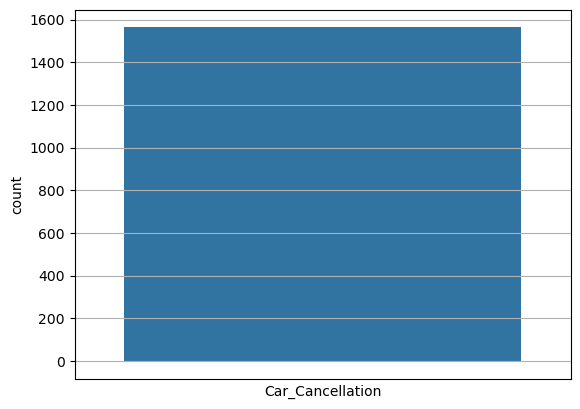

In [377]:
sns.countplot(x='Car_Cancellation', data=tt1)
plt.show()
# Analysis: Almost 1% of long distance travel is canelled. May not be  huge difference to business and not useful for machine learning.

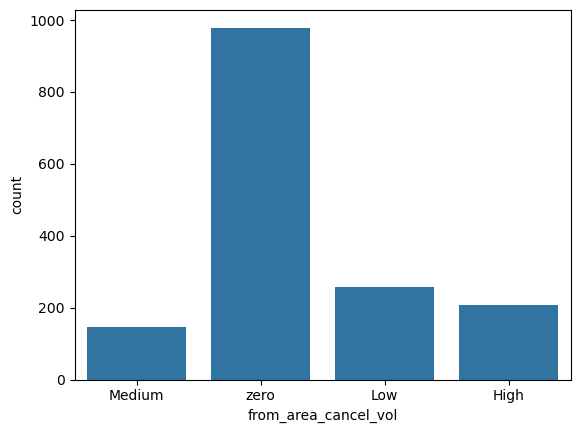

In [378]:
sns.countplot(x='from_area_cancel_vol', data=tt1)
plt.show()

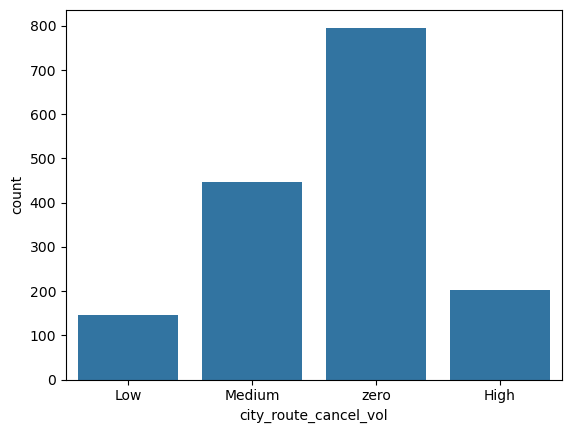

In [379]:
sns.countplot(x='city_route_cancel_vol' , data=tt1)
plt.show()

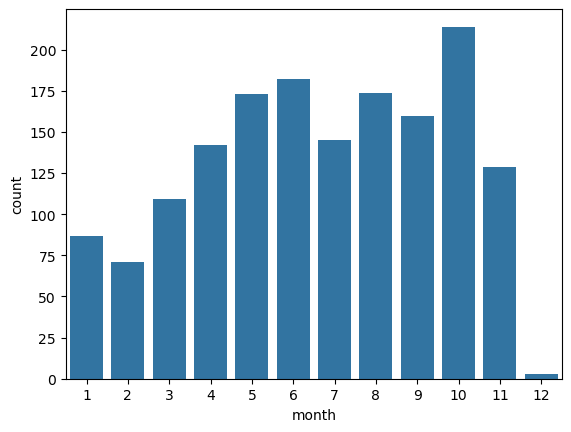

In [380]:
sns.countplot(x='month', data=tt1)
plt.show()

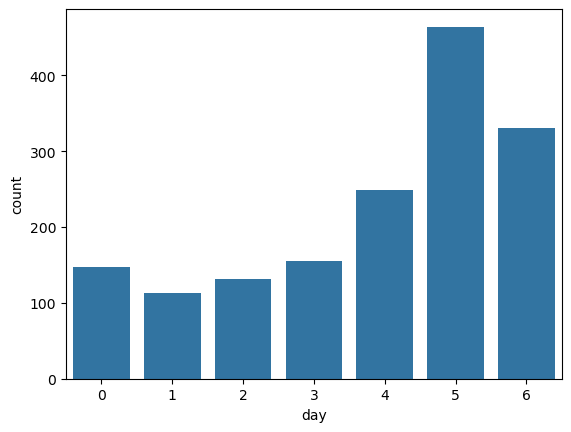

In [381]:
sns.countplot(x='day', data=tt1)
plt.show()

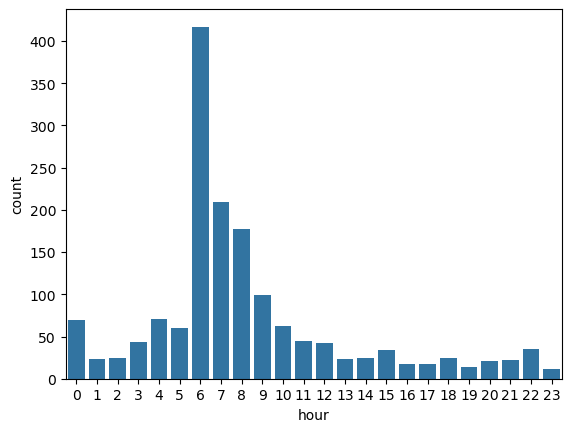

In [382]:
sns.countplot(x='hour', data=tt1)
plt.show()

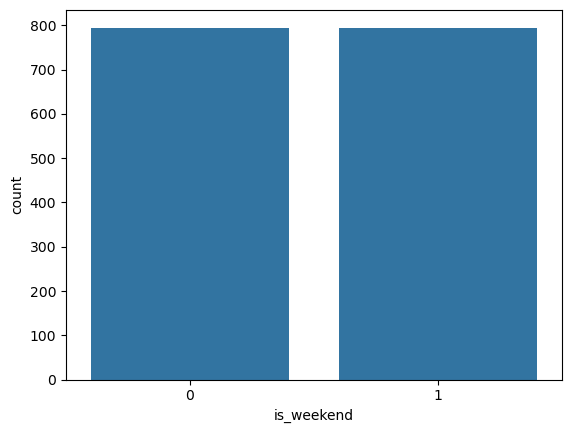

In [383]:
sns.countplot(x='is_weekend', data=tt1)
plt.show()

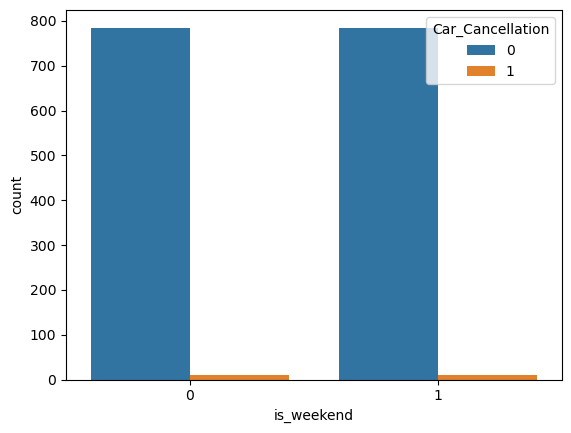

In [384]:
sns.countplot(x='is_weekend', hue = 'Car_Cancellation', data=tt1)
plt.show()

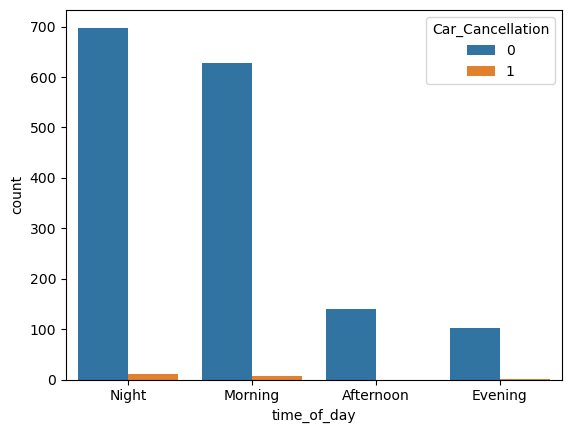

In [385]:
sns.countplot(x='time_of_day', hue = 'Car_Cancellation', data=tt1)
plt.show()

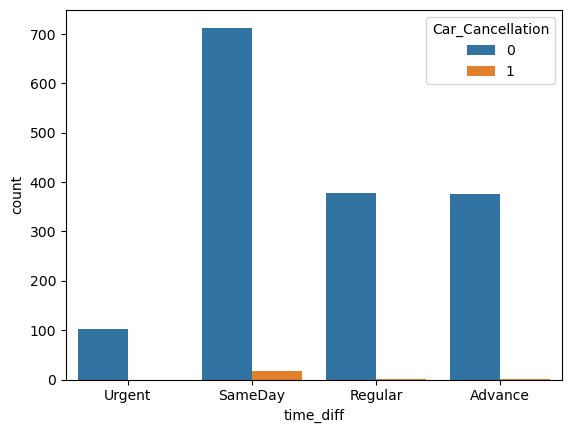

In [386]:
sns.countplot(x='time_diff', hue = 'Car_Cancellation', data=tt1)
plt.show()

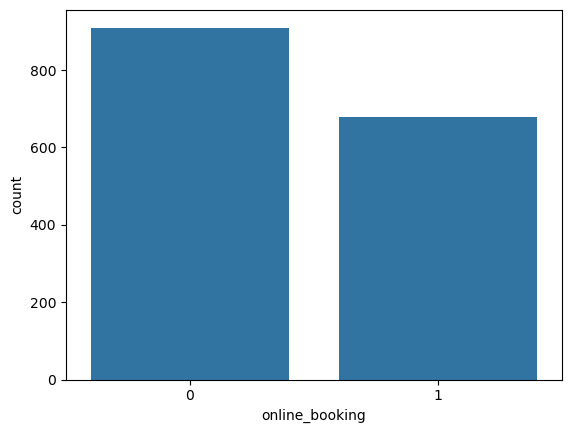

In [387]:
sns.countplot(x='online_booking',data=tt1)
plt.show()

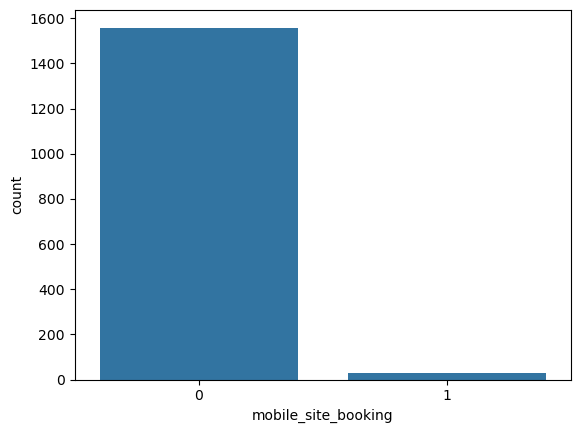

In [388]:
sns.countplot(x='mobile_site_booking',data=tt1)
plt.show()

In [389]:
tt1.head(2)

,online_booking,mobile_site_booking,Car_Cancellation,from_area_cancel_vol,city_route_cancel_vol,month,day,hour,is_weekend,time_of_day,time_diff
id,,,,,,,,,,,
132519,0,0,0,Medium,Low,1,1,9,0,Morning,Urgent
132531,1,0,0,zero,Medium,1,5,8,1,Morning,Advance


## Label Encoding

In [391]:
tt1.from_area_cancel_vol = tt1.from_area_cancel_vol.map({'zero':0,'Low':1,'Medium':2,'High':3})
tt1.city_route_cancel_vol = tt1.city_route_cancel_vol.map({'zero':0,'Low':1,'Medium':2,'High':3})
tt1.time_of_day = tt1.time_of_day.map({'Morning':1,'Afternoon':2,'Evening':3,'Night':4})
tt1.time_diff = tt1.time_diff.map({'Urgent':1,'SameDay':2,'Regular':3,'Advance':4})
tt1.head()

,online_booking,mobile_site_booking,Car_Cancellation,from_area_cancel_vol,city_route_cancel_vol,month,day,hour,is_weekend,time_of_day,time_diff
id,,,,,,,,,,,
132519,0,0,0,2,1,1,1,9,0,1,1
132531,1,0,0,0,2,1,5,8,1,1,4
132539,0,0,0,0,2,1,5,8,1,1,4
132697,1,0,0,0,0,1,4,9,0,1,3
132760,1,0,0,0,2,1,6,7,1,1,3


## Machine Learning

In [393]:
x = tt1.drop('Car_Cancellation',axis=1)
y = tt1['Car_Cancellation']

In [394]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3)

## Decision Tree Model

In [396]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [397]:
dt.fit(xtrain,ytrain)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [398]:
ypred = dt.predict(xtest)

In [399]:
from sklearn.metrics import classification_report

In [400]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       468
           1       0.50      0.33      0.40         9

    accuracy                           0.98       477
   macro avg       0.74      0.66      0.70       477
weighted avg       0.98      0.98      0.98       477



#### As you may see, because of the class imbalance the mode is too biased to be productive for prediction. Hence, travel type 1 is not fit for machine learning

## preprocessing TT2

In [403]:
tt2.head()

,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
id,,,,,,,,,,,,,,,
132512,2,NaN,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
132513,2,NaN,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
132514,2,NaN,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
132515,2,NaN,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
132517,2,NaN,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0


In [404]:
tt2.drop(['travel_type_id','package_id','from_city_id','to_city_id'],axis=1,inplace=True)

In [405]:
tt2.head(2)

,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
id,,,,,,,,,,,
132512,83.0,448.0,01-01-2013 02:00,0,0,01-01-2013 01:39,12.92415,77.67229,12.92732,77.63575,0
132513,1010.0,540.0,01-01-2013 09:00,0,0,01-01-2013 02:25,12.96691,77.74935,12.92768,77.62664,0


In [406]:
tt2.isnull().sum()

from_area_id           0
to_area_id             0
from_date              0
online_booking         0
mobile_site_booking    0
booking_created        0
from_lat               0
from_long              0
to_lat                 0
to_long                0
Car_Cancellation       0
dtype: int64

## Transform from_area_id and to_area_id

In [408]:
tt2['area_route'] = tt2.from_area_id.astype('int').astype('str') + '->' + tt2.to_area_id.astype('int').astype('str')
tt2.head(2)

,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,area_route
id,,,,,,,,,,,,
132512,83.0,448.0,01-01-2013 02:00,0,0,01-01-2013 01:39,12.92415,77.67229,12.92732,77.63575,0,83->448
132513,1010.0,540.0,01-01-2013 09:00,0,0,01-01-2013 02:25,12.96691,77.74935,12.92768,77.62664,0,1010->540


In [409]:
area_route_cancel_perc = tt2[['area_route','Car_Cancellation']].groupby('area_route').mean()['Car_Cancellation']
tt2['area_route_cancel_perc'] = tt2.area_route.map(area_route_cancel_perc)
tt2.head(2)

,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,area_route,area_route_cancel_perc
id,,,,,,,,,,,,,
132512,83.0,448.0,01-01-2013 02:00,0,0,01-01-2013 01:39,12.92415,77.67229,12.92732,77.63575,0,83->448,0.0
132513,1010.0,540.0,01-01-2013 09:00,0,0,01-01-2013 02:25,12.96691,77.74935,12.92768,77.62664,0,1010->540,0.0


In [410]:
tt2.loc[tt2.area_route_cancel_perc > 0, 'area_route_cancel_perc'].quantile(0.33)

0.043478260869565216

In [411]:
tt2.loc[tt2.area_route_cancel_perc > 0, 'area_route_cancel_perc'].quantile(0.66)

0.16666666666666666

In [412]:
tt2['area_route_cancel_vol'] = np.where(tt2.area_route_cancel_perc >= 0.17, ' High',
                               np.where(tt2.area_route_cancel_perc == 0.0, ' Zero',
                                np.where(tt2.area_route_cancel_perc <= 0.043, ' Low','Medium')))


In [413]:
tt2.head(3)

,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,area_route,area_route_cancel_perc,area_route_cancel_vol
id,,,,,,,,,,,,,,
132512,83.0,448.0,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0,83->448,0.0,Zero
132513,1010.0,540.0,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0,1010->540,0.0,Zero
132514,1301.0,1034.0,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0,1301->1034,0.0,Zero


In [414]:
tt2.drop(['from_area_id','to_area_id','area_route','area_route_cancel_perc'],axis=1,inplace=True)
tt2.head(2)

,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,area_route_cancel_vol
id,,,,,,,,,,
132512,01-01-2013 02:00,0,0,01-01-2013 01:39,12.92415,77.67229,12.92732,77.63575,0,Zero
132513,01-01-2013 09:00,0,0,01-01-2013 02:25,12.96691,77.74935,12.92768,77.62664,0,Zero


## Transform the coordinates to distance

In [416]:
!pip install geopy

In [417]:
from geopy.distance import geodesic

In [418]:
def calc_dist(row):
    _from = (row['from_lat'],row['from_long'])
    _to = (row['to_lat'],row['to_long'])
    return geodesic(_from,_to).kilometers

In [419]:
tt2.apply(calc_dist,axis=1)

id
132512     3.980687
132513    14.004432
132514    12.648909
132515     9.534596
132517    14.655467
            ...    
185936    12.180435
185937    10.681284
185938    21.251031
185940     4.584142
185941    25.432381
Length: 34292, dtype: float64

In [420]:
tt2['distance'] = tt2.apply(calc_dist,axis=1)
tt2.head(2)

,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,area_route_cancel_vol,distance
id,,,,,,,,,,,
132512,01-01-2013 02:00,0,0,01-01-2013 01:39,12.92415,77.67229,12.92732,77.63575,0,Zero,3.980687
132513,01-01-2013 09:00,0,0,01-01-2013 02:25,12.96691,77.74935,12.92768,77.62664,0,Zero,14.004432


In [421]:
tt2.drop(['from_lat','from_long','to_lat','to_long'],axis=1,inplace=True)
tt2.head()

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,area_route_cancel_vol,distance
id,,,,,,,
132512,01-01-2013 02:00,0,0,01-01-2013 01:39,0,Zero,3.980687
132513,01-01-2013 09:00,0,0,01-01-2013 02:25,0,Zero,14.004432
132514,01-01-2013 03:30,0,0,01-01-2013 03:08,0,Zero,12.648909
132515,01-01-2013 05:45,0,0,01-01-2013 04:39,0,Zero,9.534596
132517,01-01-2013 09:00,0,0,01-01-2013 07:53,0,Zero,14.655467


In [422]:
tt2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34292 entries, 132512 to 185941
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   from_date              34292 non-null  object 
 1   online_booking         34292 non-null  int64  
 2   mobile_site_booking    34292 non-null  int64  
 3   booking_created        34292 non-null  object 
 4   Car_Cancellation       34292 non-null  int64  
 5   area_route_cancel_vol  34292 non-null  object 
 6   distance               34292 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 2.1+ MB


In [423]:
tt2.from_date = pd.to_datetime(tt2.from_date,format='mixed')
tt2.booking_created = pd.to_datetime(tt2.booking_created,format = 'mixed')

In [424]:
tt2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34292 entries, 132512 to 185941
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   from_date              34292 non-null  datetime64[ns]
 1   online_booking         34292 non-null  int64         
 2   mobile_site_booking    34292 non-null  int64         
 3   booking_created        34292 non-null  datetime64[ns]
 4   Car_Cancellation       34292 non-null  int64         
 5   area_route_cancel_vol  34292 non-null  object        
 6   distance               34292 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(3), object(1)
memory usage: 2.1+ MB


In [425]:
tt2['month'] = tt2.from_date.dt.month
tt2['day'] = tt2.from_date.dt.dayofweek  # Monday is zero | sunday is 6
tt2['hour'] = tt2.from_date.dt.hour
tt2.head(2)

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,area_route_cancel_vol,distance,month,day,hour
id,,,,,,,,,,
132512,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,0,Zero,3.980687,1,1,2
132513,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,0,Zero,14.004432,1,1,9


In [426]:
tt2['is_weekend'] = (tt2.day >= 5).astype('int')
tt2.head(2)

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,area_route_cancel_vol,distance,month,day,hour,is_weekend
id,,,,,,,,,,,
132512,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,0,Zero,3.980687,1,1,2,0
132513,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,0,Zero,14.004432,1,1,9,0


In [427]:
tt2['time_of_day'] = pd.cut(tt2.hour,bins=[-1,6,12,18,24],labels=['Night','Morning','Afternoon','Evening'])
tt2.head(2)

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,area_route_cancel_vol,distance,month,day,hour,is_weekend,time_of_day
id,,,,,,,,,,,,
132512,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,0,Zero,3.980687,1,1,2,0,Night
132513,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,0,Zero,14.004432,1,1,9,0,Morning


In [428]:
tt2['time_diff'] = (tt2.from_date - tt2.booking_created).dt.total_seconds()/3600
tt2.head(2)

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,area_route_cancel_vol,distance,month,day,hour,is_weekend,time_of_day,time_diff
id,,,,,,,,,,,,,
132512,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,0,Zero,3.980687,1,1,2,0,Night,0.350000
132513,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,0,Zero,14.004432,1,1,9,0,Morning,6.583333


In [429]:
tt2.time_diff.describe()

count    34292.000000
mean        37.202130
std        100.917727
min        -22.900000
25%          3.183333
50%          8.833333
75%         19.166667
max       1906.900000
Name: time_diff, dtype: float64

In [430]:
tt2['nature'] = pd.cut(tt2.time_diff,bins=[-23,2,18,48,2000],labels=['Urgent','SameDay','Regular','Advanced'])
tt2.head(2)

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,area_route_cancel_vol,distance,month,day,hour,is_weekend,time_of_day,time_diff,nature
id,,,,,,,,,,,,,,
132512,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,0,Zero,3.980687,1,1,2,0,Night,0.350000,Urgent
132513,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,0,Zero,14.004432,1,1,9,0,Morning,6.583333,SameDay


In [431]:
tt2.drop(['from_date','booking_created','time_diff'],axis=1,inplace=True)
tt2.head(2)

,online_booking,mobile_site_booking,Car_Cancellation,area_route_cancel_vol,distance,month,day,hour,is_weekend,time_of_day,nature
id,,,,,,,,,,,
132512,0,0,0,Zero,3.980687,1,1,2,0,Night,Urgent
132513,0,0,0,Zero,14.004432,1,1,9,0,Morning,SameDay


In [432]:
tt2 = tt2[['area_route_cancel_vol','distance','month','day','hour','is_weekend','time_of_day','nature','online_booking','mobile_site_booking','Car_Cancellation']]
tt2.head(2)

,area_route_cancel_vol,distance,month,day,hour,is_weekend,time_of_day,nature,online_booking,mobile_site_booking,Car_Cancellation
id,,,,,,,,,,,
132512,Zero,3.980687,1,1,2,0,Night,Urgent,0,0,0
132513,Zero,14.004432,1,1,9,0,Morning,SameDay,0,0,0


## EDA

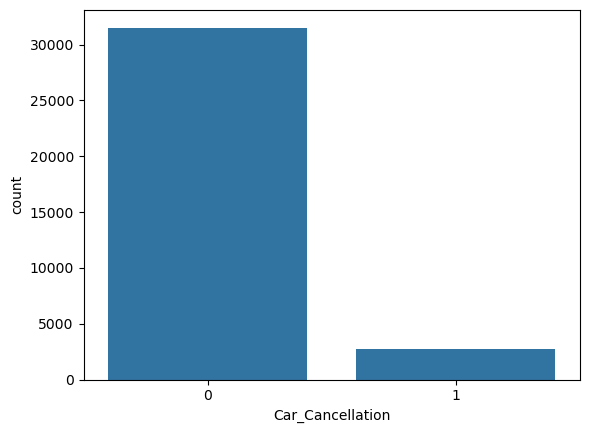

In [434]:
sns.countplot(x='Car_Cancellation',data=tt2)
plt.show()

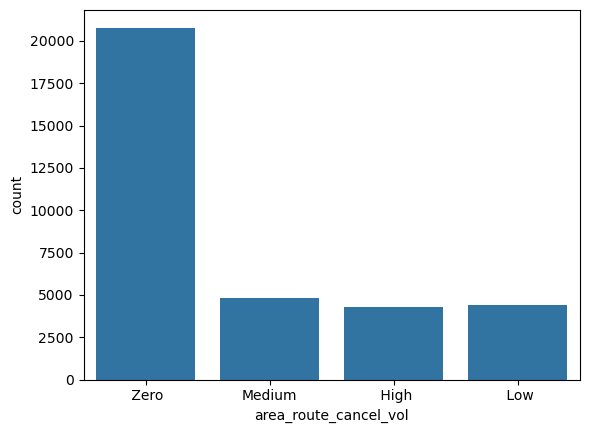

In [435]:
sns.countplot(x='area_route_cancel_vol',data=tt2)
plt.show()

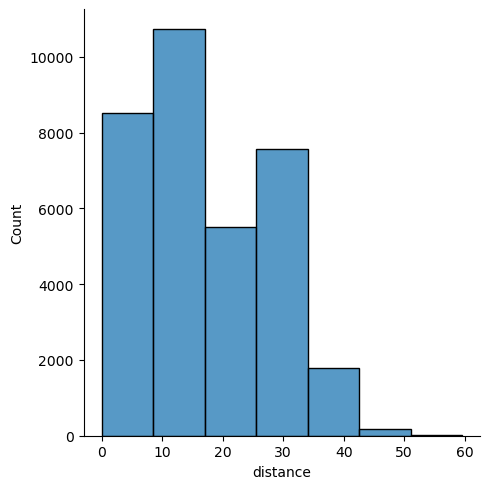

In [436]:
sns.displot(tt2.distance,bins=7)
plt.show()

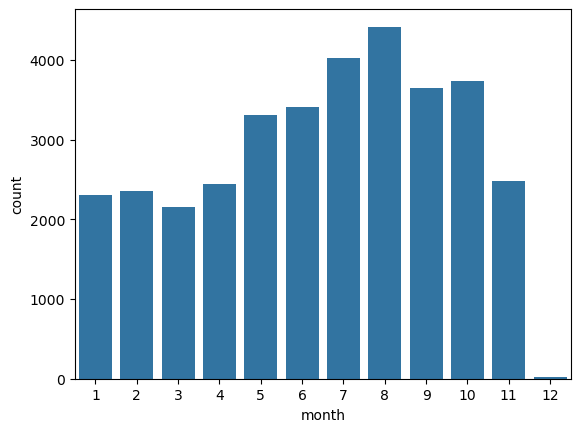

In [437]:
sns.countplot(x='month',data=tt2)
plt.show()

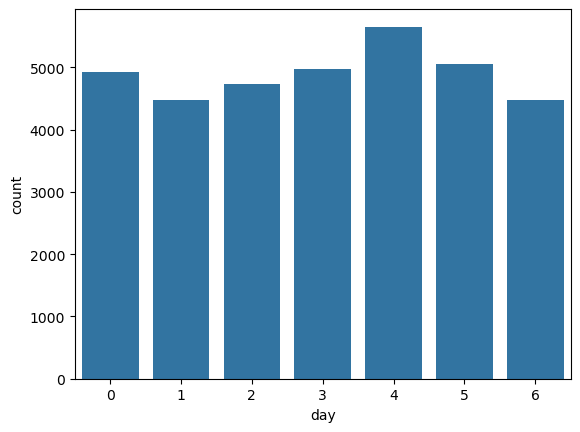

In [438]:
sns.countplot(x='day',data=tt2)
plt.show()

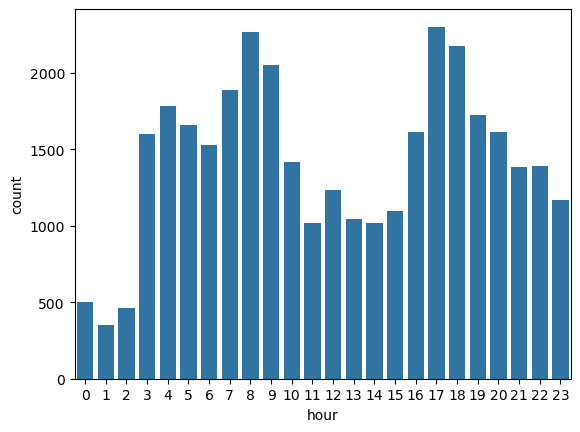

In [439]:
sns.countplot(x='hour',data=tt2)
plt.show()

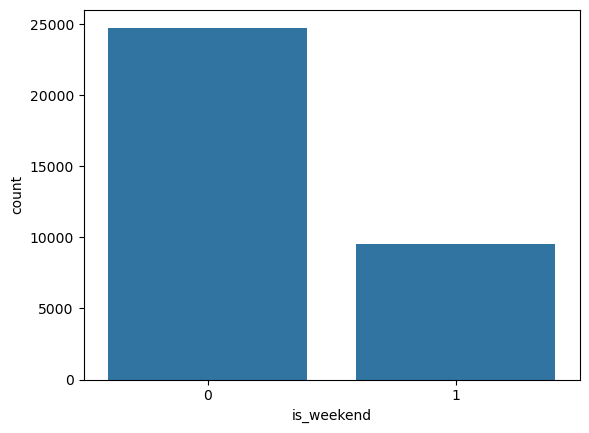

In [440]:
sns.countplot(x='is_weekend',data=tt2)
plt.show()

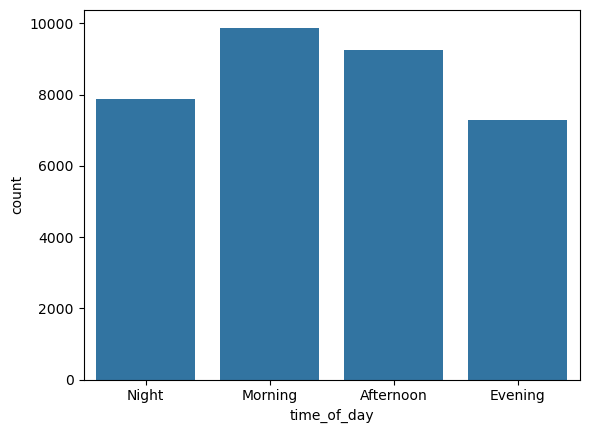

In [441]:
sns.countplot(x='time_of_day',data=tt2)
plt.show()

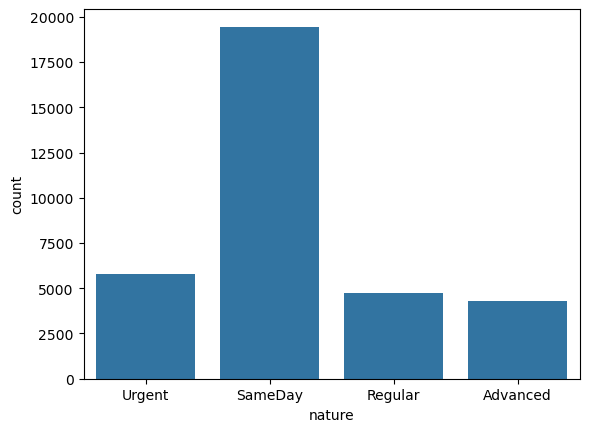

In [442]:
sns.countplot(x='nature',data=tt2)
plt.show()

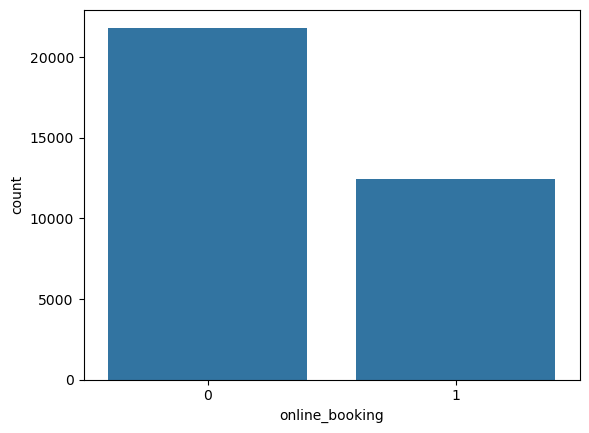

In [443]:
sns.countplot(x='online_booking',data=tt2)
plt.show()

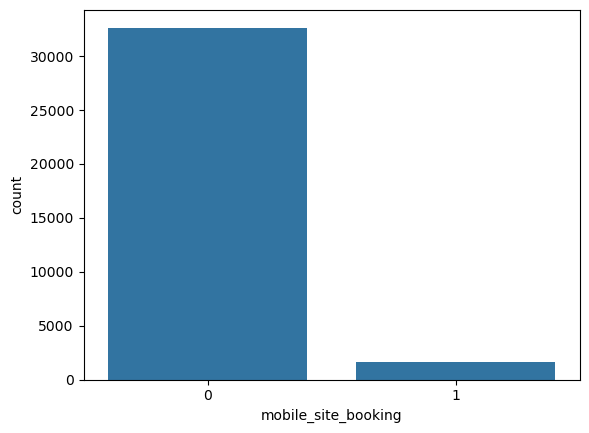

In [444]:
sns.countplot(x='mobile_site_booking',data=tt2)
plt.show()

In [445]:
tt2.head(2)

,area_route_cancel_vol,distance,month,day,hour,is_weekend,time_of_day,nature,online_booking,mobile_site_booking,Car_Cancellation
id,,,,,,,,,,,
132512,Zero,3.980687,1,1,2,0,Night,Urgent,0,0,0
132513,Zero,14.004432,1,1,9,0,Morning,SameDay,0,0,0


## Label Encoding

In [447]:
tt2.area_route_cancel_vol = tt2.area_route_cancel_vol.map({'Zero':0,'Low':1,'Medium':2,'High':3})
tt2.time_of_day = tt2.time_of_day.map({'Morning':1,'Afternoon':2,'Evening':3,'Night':4})
tt2.nature = tt2.nature.map({'Urgent':1,'SameDay':2,'Regular':3,'Advance':4})
tt2.head()

,area_route_cancel_vol,distance,month,day,hour,is_weekend,time_of_day,nature,online_booking,mobile_site_booking,Car_Cancellation
id,,,,,,,,,,,
132512,NaN,3.980687,1,1,2,0,4,1.0,0,0,0
132513,NaN,14.004432,1,1,9,0,1,2.0,0,0,0
132514,NaN,12.648909,1,1,3,0,4,1.0,0,0,0
132515,NaN,9.534596,1,1,5,0,4,1.0,0,0,0
132517,NaN,14.655467,1,1,9,0,1,1.0,0,0,0


## Machine Learning

In [449]:
x = tt2.drop('Car_Cancellation',axis=1)
y = tt2['Car_Cancellation']

In [450]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3)

## Decision Tree Classifier

In [452]:
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      9400
           1       0.31      0.33      0.32       888

    accuracy                           0.88     10288
   macro avg       0.62      0.63      0.63     10288
weighted avg       0.88      0.88      0.88     10288



## Naive Bayes Classifier

In [454]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xtrain,ytrain)
ypred = nb.predict(xtest)
print(classification_report(ytest,ypred))

ValueError: Input X contains NaN.
GaussianNB does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## Random Forest Classifier

In [455]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500)
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      9400
           1       0.52      0.27      0.36       888

    accuracy                           0.92     10288
   macro avg       0.73      0.62      0.65     10288
weighted avg       0.90      0.92      0.90     10288

